In [23]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc("font", size=13)
import seaborn as sns

In [24]:
names = [
    "apache1",
    "bcircuit",
    "bcsstk18",
    "cant",
    "cbuckle",
    "consph",
    "ct20stif",
    "ex10",
    "msc04515",
    "Na5",
    "Pres_Poisson",
    "raefsky4",
    "s1rmq4m1",
    "vanbody",
    "vibrobox",
]

TESTING_DATA_SIZE = 1000

df_combined = pd.DataFrame()

for name in names:
    df_single = pd.read_csv(f"data/{name}_{TESTING_DATA_SIZE}.csv")
    df_combined = pd.concat([df_combined, df_single])

df_combined["mat_name"] = df_combined["mat_name"].apply(lambda n: n[:-4])

df_combined.head()

,mat_name,errorfree_iterations,tol,maxiter,error_pos,error_iter,solve_iterations,final_relres,did_converge,realtime_s,pos_2norm,n_rows,slowdown
0,apache1,131,0.000001,13100,10808,123,131,9.389179e-07,True,0.312593,1895.415522,80800,1.000000
1,apache1,131,0.000001,13100,66786,58,316,7.997110e-07,True,0.699457,220467.141134,80800,2.412214
2,apache1,131,0.000001,13100,1555,79,136,9.406919e-07,True,0.320970,15022.272575,80800,1.038168
3,apache1,131,0.000001,13100,8516,120,149,7.580728e-07,True,0.357881,128509.915571,80800,1.137405
4,apache1,131,0.000001,13100,66203,129,135,8.178302e-07,True,0.327799,15022.272575,80800,1.030534


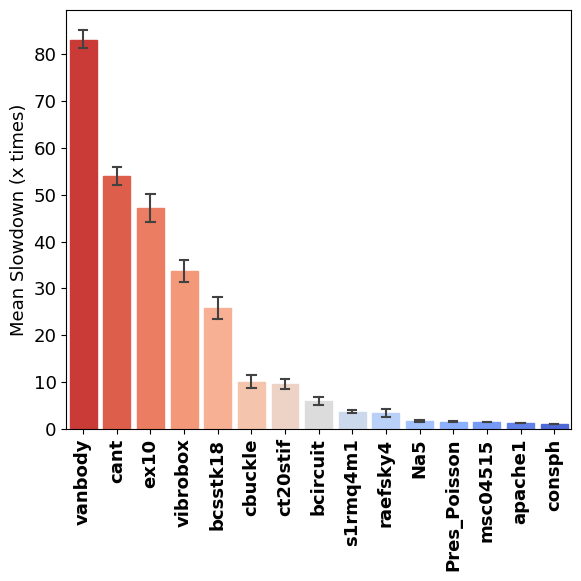

In [25]:
df_slowdowns = df_combined[["mat_name", "slowdown"]].groupby(
    "mat_name", group_keys=False).apply(lambda x: x).reset_index(level=0, drop=True)
colors = sns.color_palette("coolwarm", n_colors=len(names))
order = df_slowdowns.groupby("mat_name").mean().sort_values("slowdown", ascending=False).index

hist = sns.barplot(df_slowdowns, x="mat_name", y="slowdown", hue="mat_name", palette=colors, order=order,
                   capsize=0.25, err_kws={"linewidth": 1.5}, width=0.8)
for i, p in enumerate(sorted([p for p in hist.patches if p.get_height() > 0], key=lambda p: p.get_height())):
    p.set_color(colors[i])

plt.xticks(ticks=range(len(order)), labels=order, rotation=90, weight="bold")
plt.xlabel("")
plt.ylabel("Mean Slowdown (x times)")

plt.gcf().set_size_inches(6, 6)
plt.gcf().set_dpi(100)

plt.tight_layout()
plt.savefig("./figures/mean_slowdowns_by_matrix")
plt.show()

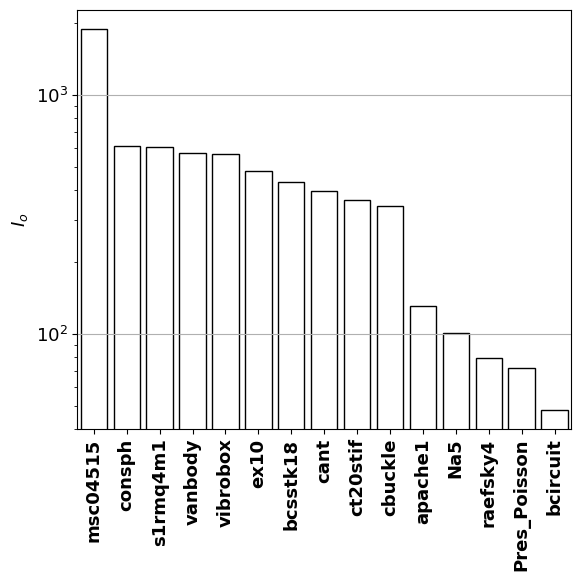

In [26]:
df_iters = df_combined[["mat_name", "errorfree_iterations", "solve_iterations"]].groupby(
    "mat_name", group_keys=False).apply(lambda x: x).reset_index(level=0, drop=True)
order = df_iters.groupby("mat_name").mean().sort_values("errorfree_iterations", ascending=False).index

hist = sns.barplot(df_iters, x="mat_name", y="errorfree_iterations", color="black", fill=False,
                   order=order, errorbar=None, width=0.8, linewidth=1)

plt.xticks(ticks=range(len(order)), labels=order, rotation=90, weight="bold")
plt.xlabel("")
plt.yscale("log")
plt.ylabel("$I_o$")
plt.grid(axis="y")

plt.gcf().set_size_inches(6, 6)
plt.gcf().set_dpi(100)
plt.tight_layout()

plt.savefig("./figures/Io_by_matrix")
plt.show()

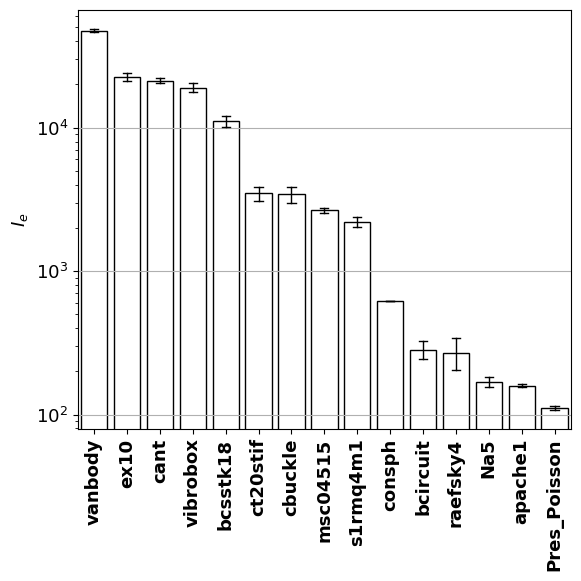

In [27]:
order = df_iters.groupby("mat_name").mean().sort_values("solve_iterations", ascending=False).index

hist = sns.barplot(df_iters, x="mat_name", y="solve_iterations", color="black", fill=False, linewidth=1,
                   order=order, capsize=0.25, err_kws={"linewidth": 1}, width=0.8)

plt.xticks(ticks=range(len(order)), labels=order, rotation=90, weight="bold")
plt.xlabel("")
plt.yscale("log")
plt.ylabel("$I_e$")
plt.grid(axis="y")

plt.gcf().set_size_inches(6, 6)
plt.gcf().set_dpi(100)
plt.tight_layout()

plt.savefig("./figures/Ie_by_matrix")
plt.show()